Internet use and religion in Europe, part three
-----------------------------------------

This notebook presents explorations of the association between Internet use and religion in Europe, using data from the European Social Survey (http://www.europeansocialsurvey.org).

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [100]:
from __future__ import print_function, division

import string
import random

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

import thinkstats2
import thinkplot
import matplotlib.pyplot as plt

import ess

%matplotlib inline

The following function selects the columns I need.

In [29]:
%time cycles = ess.read_all_cycles()

CPU times: user 13.9 s, sys: 1.58 s, total: 15.4 s
Wall time: 15.4 s


Read data from Cycle 1.

In [32]:
for cycle in cycles:
    %time ess.clean_cycle(cycle)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 11.2 ms
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.02 ms
CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 8.55 ms
CPU times: user 8 ms, sys: 4 ms, total: 12 ms
Wall time: 9.56 ms
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.35 ms


Read data from Cycle 2.

In [33]:
%time cycle_maps = [ess.resample(cycle) for cycle in cycles]
for cycle_map in cycle_maps:
    print(len(cycle_map), 'countries')

CPU times: user 336 ms, sys: 52 ms, total: 388 ms
Wall time: 388 ms
22 countries
25 countries
23 countries
29 countries
27 countries


Read data from Cycle 3.

In [34]:
%time ess.remove_missing(cycle_maps)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 574 µs


Read data from Cycle 4.

In [35]:
for cycle_map in cycle_maps:
    %time ess.replace_with_ranks(cycle_map)

CPU times: user 148 ms, sys: 0 ns, total: 148 ms
Wall time: 147 ms
CPU times: user 160 ms, sys: 0 ns, total: 160 ms
Wall time: 162 ms
CPU times: user 160 ms, sys: 0 ns, total: 160 ms
Wall time: 160 ms
CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 248 ms
CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 201 ms


Read data from Cycle 5.

In [36]:
for cycle_map in cycle_maps:
    %time ess.fill_vars_by_country(cycle_map)

CPU times: user 280 ms, sys: 84 ms, total: 364 ms
Wall time: 365 ms
CPU times: user 296 ms, sys: 100 ms, total: 396 ms
Wall time: 396 ms
CPU times: user 284 ms, sys: 116 ms, total: 400 ms
Wall time: 402 ms
CPU times: user 384 ms, sys: 116 ms, total: 500 ms
Wall time: 502 ms
CPU times: user 356 ms, sys: 120 ms, total: 476 ms
Wall time: 478 ms


In [38]:
%time dfs = [ess.concat_groups(cycle_map) for cycle_map in cycle_maps]
for df in dfs:
    print(len(df))

CPU times: user 72 ms, sys: 16 ms, total: 88 ms
Wall time: 88.2 ms
37937
43709
43000
56752
52458


In [39]:
%time df = pd.concat(dfs, ignore_index=True)
print(df.shape)

CPU times: user 16 ms, sys: 12 ms, total: 28 ms
Wall time: 24.9 ms
(233856, 32)


In [15]:
grouped = df.groupby('cntry')
len(grouped)

34

In a each cycle, a few questions were not asked in some countries.

In [40]:
reload(ess)
%time cycles = ess.read_and_clean()

In [44]:
reload(ess)
%time df = ess.resample_and_fill(cycles)

resampling
removing
replacing
Round 1
HU hinctnta
IE hinctnta
Round 2
EE hinctnta
UA hinctnta
Round 3
HU hinctnta
EE hinctnta
UA hinctnta
Round 4
BG hinctnta
CY hinctnta
SK hinctnta
Round 5
PT hinctnta
filling
concating
CPU times: user 3 s, sys: 628 ms, total: 3.62 s
Wall time: 3.64 s


In [45]:
store = pd.HDFStore('ess.resamples.h5')

To fill missing values, I am drawing random samples from the available values, on a per-country basis.

Since I am not modeling relationships between variables, I am losing some information with this replacement policy; the net effect is to understate the actual strength of all relationships.

In [46]:
%time store.put('df', df)

CPU times: user 124 ms, sys: 56 ms, total: 180 ms
Wall time: 182 ms


In [48]:
%time df = store.get('df')

CPU times: user 32 ms, sys: 24 ms, total: 56 ms
Wall time: 54.5 ms


Concatenate the cycles.

In [59]:
store.keys()

[]

In [91]:
def random_name():
    t = [random.choice(string.ascii_letters) for i in range(6)]
    return ''.join(t)

random_name()

'KzFWeo'

TV watching time on average weekday

In [197]:
reload(ess)
for i in range(100):
    name = random_name()
    print(name)
    df = ess.resample_and_fill(cycles)
    store.put(name, df)

GownbC
XGmIIH
dyuBXv
YeASVz
Evkitq
qchGUz
tjjdLV
dzpDVu
tiUoXr
xjbtHM
jNqZpZ
KFwczR
AOacJP
VzZAXk
xxGtEc
btCIZx
NfzPAX
kVTeXb
DOKcxz
iWltCV
EBHNWn
hlJZff
bvntaM
RHVBHl
uWhsWV
FWawby
tIBOEC
EIaigX
RwJMYt
GIKXkG
KEthFz
PptHII
GPBBMj
vPnlcH
InEXbB
FJboqX
xwCakd
AsSyrK
shBLMW
YoxGxL
GeolrR
XOxJQN
JomohW
TOcaLi
EOOBpB
pezcXZ
ZgSZAY
AAVZWa
blIIdK
xgAfWd
cEzhky
lHDxRr
ewfhTI
JznRlw
qWZfql
mbTfIj
yImumW
KUVnJc
JofMZK
JVSJPq
PvfGpy
ybmXrn
TaHTXL
nvZcGU
dqGBQR
WkfCQW
OdhAjf
PXxSpS
wahSMf
wGQrTR
CxkVBv
GdTLTY
UKzbGY
QbhbQt
YvdfEk
qRQqmc
EoHBcy
nOsmSf
cYiUkH
MCmopN
BytXnJ
WwTDDj
ssTuqu
zYbdcJ
iABzcU
yKuLlN
rUWSeP
PiWfGA
BIXejR
GeUlsB
rYeOLP
GYhuaT
JKBolS
iaTUMA
xfKUcU
SHnJcB
QskeUe
lfUmXq
VgqgVe
uOAidw


Radio listening, total time on average weekday.

In [198]:
keys = store.keys()
len(keys)

204

Newspaper reading, total time on average weekday.

In [199]:
key = random.choice(keys)
df = store.get(key)

Personal use of Internet, email, www

Here's the model with all control variables and all media variables:

In [200]:
formula = ('hasrelig_f ~ yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')
res = ess.run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:               233856
Model:                          Logit   Df Residuals:                   233848
Method:                           MLE   Df Model:                            7
Date:                Wed, 18 Nov 2015   Pseudo R-squ.:                 0.02772
Time:                        13:25:24   Log-Likelihood:            -1.4865e+05
converged:                       True   LL-Null:                   -1.5289e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1143      0.017     66.830      0.000         1.082     1.147
yrbrn60_f     -0.0078      0.000    -28.191      0.000        -0.008    -0.007
edurank_f     -0.0429      0.017     -2.537      0.011        -0.076    -0.010
hincrank_f     0.0678      0.016      4.274      0.000         0.037     0.099
tvtot_f       -0.0139      0.002     -6.264      0.000        -0.018    -0.010
rdtot_f       -0.0196      0.002    -11.750      0.000        -0.023    -0.016
nwsptot_f     -0.0388      0.004    -10.885      0.000        -0.046    -0.032
netuse_f      -0.1028      0.002    -59.539      0.000        -0.106    -0.099
==============================================================================
"""

Now adding inwyr07

In [201]:
formula = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')
res = ess.run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:               233856
Model:                          Logit   Df Residuals:                   233847
Method:                           MLE   Df Model:                            8
Date:                Wed, 18 Nov 2015   Pseudo R-squ.:                 0.03130
Time:                        13:25:33   Log-Likelihood:            -1.4810e+05
converged:                       True   LL-Null:                   -1.5289e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.1474      0.017     68.390      0.000         1.114     1.180
inwyr07_f      0.0511      0.002     32.995      0.000         0.048     0.054
yrbrn60_f     -0.0084      0.000    -30.239      0.000        -0.009    -0.008
edurank_f     -0.0107      0.017     -0.631      0.528        -0.044     0.023
hincrank_f     0.0810      0.016      5.093      0.000         0.050     0.112
tvtot_f       -0.0200      0.002     -8.940      0.000        -0.024    -0.016
rdtot_f       -0.0158      0.002     -9.419      0.000        -0.019    -0.013
nwsptot_f     -0.0317      0.004     -8.825      0.000        -0.039    -0.025
netuse_f      -0.1130      0.002    -64.205      0.000        -0.116    -0.110
==============================================================================
"""

In [254]:
class Country:
    def __init__(self, code, nobs):
        self.code = code
        self.name = ess.country_name(code)
        self.nobs = nobs
        self.mean_seq = []
        self.param_seq = []
        self.param2_seq = []

    def add_mean(self, mean):
        self.mean_seq.append(mean)
        
    def add_params(self, params):
        self.param_seq.append(params)
        
    def add_params2(self, params):
        self.param2_seq.append(params)
        
    def get_means(self, varname):
        t = [mean[varname] for mean in self.mean_seq]
        return np.array(t)

    def get_params(self, varname):
        t = [params[varname] for params in self.param_seq]
        return np.array(t)

    def get_params2(self, varname):
        t = [params[varname] for params in self.param2_seq]
        return np.array(t)

Make the country objects

In [290]:
keys = store.keys()
key = random.choice(keys)
df = store.get(key)

grouped = df.groupby('cntry')
country_map = {}

for code, group in grouped:
    country_map[code] = Country(code, len(group))
    print(country_map[code].name)

Austria
Belgium
Bulgaria
Switzerland
Cyprus
Czech Republic
Germany
Denmark
Estonia
Spain
Finland
France
United Kingdom
Greece
Croatia
Hungary
Ireland
Israel
Iceland
Italy
Lithuania
Luxembourg
Latvia
Netherlands
Norway
Poland
Portugal
Romania
Russia
Sweden
Slovenia
Slovakia
Turkey
Ukraine


In [291]:
formula1 = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

formula2 = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

def process_frame(df):
    grouped = df.groupby('cntry')
    for code, group in grouped:
        country = country_map[code]
        country.add_mean(group.mean())
    
        model = smf.logit(formula1, data=group)    
        results = model.fit(disp=False)
        country.add_params(results.params)
        
        model = smf.ols(formula2, data=group)    
        results = model.fit(disp=False)
        country.add_params2(results.params)

In [292]:
for key in store.keys():
    print(key)
    df = store.get(key)
    process_frame(df)

/AAVZWa
/ADbUvD
/AJEDdF
/AOacJP
/AsSyrK
/BIXejR
/Blwttj
/BytXnJ
/CuiQgF
/CxkVBv
/DOKcxz
/DSSzPM
/DdpHTg
/EBHNWn
/EHuhuk
/EIaigX
/EOOBpB
/EdeAYH
/EiftYh
/EoHBcy
/Evkitq
/FJboqX
/FWawby
/GIKXkG
/GPBBMj
/GYhuaT
/GdTLTY
/GeUlsB
/GeolrR
/GkMwBV
/GownbC
/GrCTmE
/HGSBFA
/HemGKU
/HujYDN
/IKLjEu
/IORbkE
/IXYMov
/InEXbB
/JKBolS
/JVSJPq
/JofMZK
/JomohW
/JznRlw
/KEthFz
/KFwczR
/KUVnJc
/KnKXTR
/KuGUhG
/KudtCP
/LaUmLC
/LissvE
/LmraEV
/MCmopN
/MIdmWa
/MgSdJx
/NJjQrX
/NfzPAX
/OJZEtt
/Oaksmf
/OdhAjf
/PJETsk
/PXxSpS
/PiWfGA
/PptHII
/PvfGpy
/QTTYTa
/QbhbQt
/QoHLXF
/QskeUe
/QtkeEX
/RHVBHl
/RRpxwc
/RYtpJo
/RuCVox
/RwJMYt
/SHnJcB
/ScbnLb
/TOcaLi
/TRVSRU
/TaHTXL
/UKzbGY
/UVvNeb
/UfXGIO
/VHIVpS
/VcRwRL
/VgqgVe
/VlUfcv
/VzZAXk
/WczOWP
/WkLtrX
/WkfCQW
/WlHtRg
/WwTDDj
/WxWlWp
/XGmIIH
/XOxJQN
/XhgvtL
/YMsFSK
/YeASVz
/YoxGxL
/YvdfEk
/ZEEBve
/ZXovwc
/ZgSZAY
/ZjGafB
/ZxNahg
/bJIOjl
/bNKOFy
/bOZZkd
/blIIdK
/btCIZx
/bvntaM
/cEzhky
/cYiUkH
/cgKsnt
/czQkEF
/dcjEvm
/dqGBQR
/dyuBXv
/dzpDVu
/eDVvJf
/ewfhTI
/fBFUGB
/fEkGRW


In [294]:
varname = 'netuse_f'
country = country_map['BE']
params = country.get_params2(varname)
len(params)

204

In [295]:
def extract_params(country_map, param_func):
    t = []
    for code, country in sorted(country_map.items()):
        name = country.name

        params = param_func(country)
        param = np.median(params)
        low = np.percentile(params, 2.5)
        high = np.percentile(params, 97.5)
    
        means = country.get_means('hasrelig_f')
        mean = np.median(means)
    
        t.append((code, name, param, low, high, mean))
    
    t.sort(key=lambda x: x[2])
    return t

Plot the first figure.

In [296]:
def plot_cis(t):
    plt.figure(figsize=(8,8))

    n = len(t)
    ys = n - np.arange(n)
    codes, names, params, lows, highs, means = zip(*t)
    plt.hlines(ys, lows, highs, color='blue', linewidth=2, alpha=0.5)
    plt.plot(params, ys, 'ws', markeredgewidth=0, markersize=15)

    for param, y, code in zip(params, ys, codes):
        plt.text(param, y, code, fontsize=10, color='blue', 
                 horizontalalignment='center',
                 verticalalignment='center')

    plt.vlines(0, 0, n+1, color='gray', alpha=0.5)
    plt.yticks(ys, names)

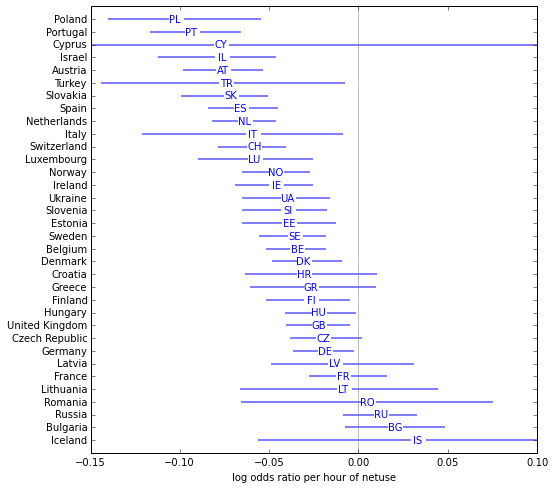

In [297]:
def param_func(country):
    return country.get_params('netuse_f')

t = extract_params(country_map, param_func)
plot_cis(t)
thinkplot.Config(xlabel='log odds ratio per hour of netuse', 
                 xlim=[-0.15, 0.1])

-0.38248029366


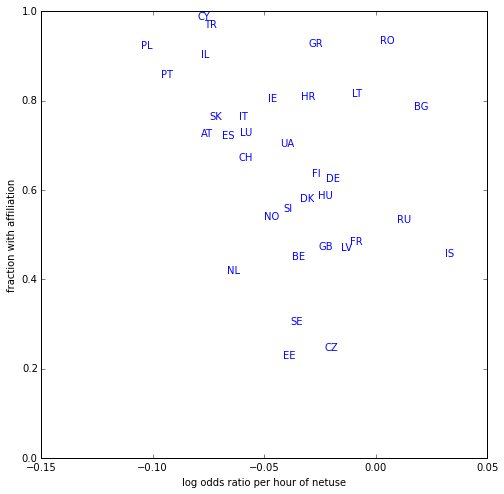

In [298]:
def plot_scatter(t):
    plt.figure(figsize=(8,8))

    codes, names, params, lows, highs, means = zip(*t)

    for param, mean, code in zip(params, means, codes):
        plt.text(param, mean, code, fontsize=10, color='blue', 
                 horizontalalignment='center',
                 verticalalignment='center')
        
    corr = np.corrcoef(params, means)[0][1]
    print(corr)

plot_scatter(t)
thinkplot.Config(xlabel='log odds ratio per hour of netuse',
                 ylabel='fraction with affiliation',
                 xlim=[-0.15, 0.05])

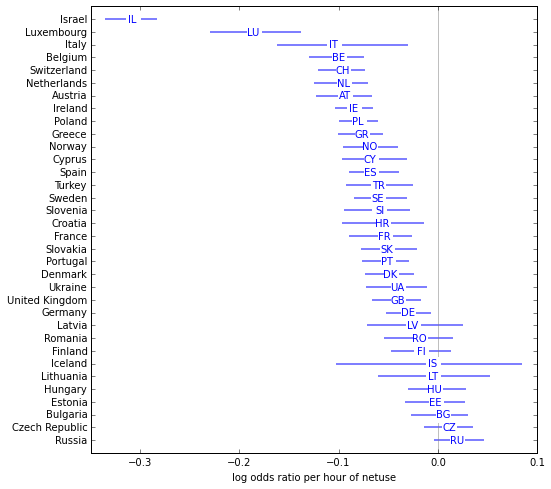

In [299]:
def param_func(country):
    return country.get_params2('netuse_f')

t = extract_params(country_map, param_func)
plot_cis(t)
thinkplot.Config(xlabel='log odds ratio per hour of netuse', 
                 xlim=[-0.35, 0.1])

-0.329939838799


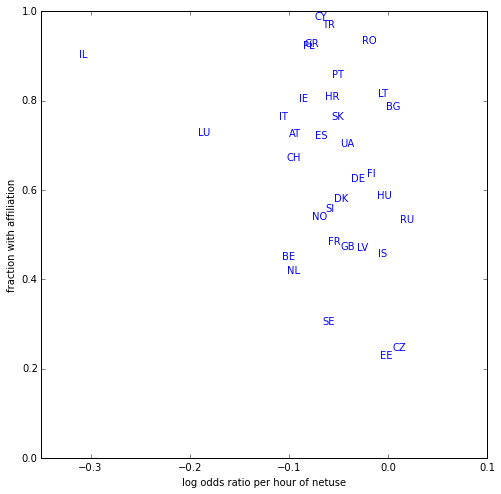

In [300]:
def plot_scatter(t):
    plt.figure(figsize=(8,8))

    codes, names, params, lows, highs, means = zip(*t)

    for param, mean, code in zip(params, means, codes):
        plt.text(param, mean, code, fontsize=10, color='blue', 
                 horizontalalignment='center',
                 verticalalignment='center')
        
    corr = np.corrcoef(params, means)[0][1]
    print(corr)

plot_scatter(t)
thinkplot.Config(xlabel='log odds ratio per hour of netuse',
                 ylabel='fraction with affiliation',
                 xlim=[-0.35, 0.1])

In [301]:
df.head()

,cntry,inwyr,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,...,hasrelig_f,rlgdgr_f,yrbrn60_f,edurank_f,hincrank_f,tvtot_f,rdtot_f,nwsptot_f,netuse_f,inwyr07_f
0,BE,2002,7,2,6,0,4,4,0,2,...,0,0,-27,0.311326,0.486886,7,6,4,0,-4.587777
1,BE,2002,6,3,1,1,4,1,1,2,...,0,0,-12,0.575953,0.167451,6,1,4,1,-4.644231
2,BE,2002,4,2,7,2,2,2,6,2,...,0,5,5,0.479871,0.691997,4,7,2,6,-5.449223
3,BE,2002,5,0,1,0,1,0,7,2,...,0,2,24,0.407944,0.381305,5,1,1,7,-5.010420
4,BE,2002,2,2,2,2,2,2,6,1,...,1,6,6,0.867955,0.911231,2,2,2,6,-5.010001


In [314]:
grouped = df.groupby('cntry')
group = grouped.get_group('SE')

In [317]:
formula1 = ('hasrelig_f ~ inwyr07_f + yrbrn60_f + '
            'edurank_f + hincrank_f +'
            'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

model = smf.logit(formula1, data=group)    
results = model.fit(disp=False)

mean = group.mean()
low_net = np.percentile(group['netuse_f'], 25)
high_net = np.percentile(group['netuse_f'], 75)

def prob_hasrelig(results, df):
    return results.predict(mean)[0]

print(mean['hasrelig_f'])
print(low_net, high_net)
print(prob_hasrelig(results, mean)) 
mean.netuse_f = low_net
print(prob_hasrelig(results, mean)) 
mean.netuse_f = high_net
print(prob_hasrelig(results, mean)) 


0.300184762526
2.0 7.0
0.296450794165
0.314629530976
0.283064846846


In [46]:
run_ols(grouped, formula, 'edurank_f')

AT	6918	-0.253    	*	
BE	8939	-0.313    	*	
BG	6064	-0.646    	**	
CH	9310	-0.316    	**	
CY	3293	-0.639    	**	
CZ	8790	-0.438    	**	
DE	11568	-0.624    	**	
DK	7684	-0.374    	**	
EE	6960	0.478    	**	<--
ES	9729	-0.429    	**	
FI	7969	0.175    		
FR	5787	-0.464    	**	
GB	11117	0.428    	**	<--
GR	9759	-1.68    	**	
HR	3133	-1.22    	**	
HU	7806	-0.938    	**	
IE	10472	-0.442    	**	
IL	7283	-0.904    	**	
IS	579	0.0494    		
IT	1207	0.0235    		
LT	1677	-0.00891    		
LU	3187	-1.95    	**	
LV	1980	0.263    		
NL	9741	-0.157    		
NO	8643	0.32    	**	<--
PL	8917	-1.29    	**	
PT	10302	-0.864    	**	
RO	2146	-0.432    	*	
RU	7544	-0.0769    		
SE	9201	0.336    	**	<--
SI	7126	-0.964    	**	
SK	6944	-0.79    	**	
TR	4272	-1.16    	**	
UA	7809	-0.591    	**	


In [47]:
run_ols(grouped, formula, 'hincrank_f')

AT	6918	0.162    		
BE	8939	-0.359    	**	
BG	6064	-0.175    		
CH	9310	-0.29    	**	
CY	3293	-0.37    	**	
CZ	8790	-0.41    	**	
DE	11568	0.372    	**	<--
DK	7684	0.128    		
EE	6960	-0.44    	**	
ES	9729	-0.227    	*	
FI	7969	-0.271    	*	
FR	5787	-0.806    	**	
GB	11117	-0.529    	**	
GR	9759	-0.511    	**	
HR	3133	0.124    		
HU	7806	-0.078    		
IE	10472	-0.0518    		
IL	7283	-0.333    	*	
IS	579	0.0341    		
IT	1207	0.104    		
LT	1677	-0.531    	*	
LU	3187	-0.382    	*	
LV	1980	-0.274    		
NL	9741	-0.853    	**	
NO	8643	-0.192    		
PL	8917	-0.355    	**	
PT	10302	-0.0868    		
RO	2146	-0.178    		
RU	7544	-0.0596    		
SE	9201	-0.249    	*	
SI	7126	-0.876    	**	
SK	6944	0.0426    		
TR	4272	-0.201    		
UA	7809	-0.0463    		


Let's see what happens if we add quadratic terms for edurank and hincrank:

In [48]:
df['edurank_f2'] = df.edurank_f**2
df['hincrank_f2'] = df.hincrank_f**2

In [49]:
formula = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + edurank_f + edurank_f2 + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

In [50]:
run_ols(grouped, formula, 'edurank_f')

AT	6918	-0.669    		
BE	8939	0.186    		
BG	6064	-2.81    	**	
CH	9310	-0.863    	*	
CY	3293	-1.07    		
CZ	8790	-2.53    	**	
DE	11568	-2.79    	**	
DK	7684	-0.748    		
EE	6960	-0.671    		
ES	9729	-1.55    	**	
FI	7969	0.0851    		
FR	5787	-1.85    	**	
GB	11117	-2.16    	**	
GR	9759	-1.93    	**	
HR	3133	-1.85    	**	
HU	7806	-3.03    	**	
IE	10472	-0.237    		
IL	7283	-0.533    		
IS	579	-1.68    		
IT	1207	-2.43    	*	
LT	1677	-1.82    	*	
LU	3187	-2.46    	**	
LV	1980	-1.74    	*	
NL	9741	-0.285    		
NO	8643	-1.05    	*	
PL	8917	-2.44    	**	
PT	10302	-1.2    	**	
RO	2146	-1.35    		
RU	7544	-1.06    	*	
SE	9201	-0.788    		
SI	7126	-2.03    	**	
SK	6944	-2.73    	**	
TR	4272	-0.9    		
UA	7809	-0.66    		


In [51]:
run_ols(grouped, formula, 'edurank_f2')

AT	6918	0.412    		
BE	8939	-0.5    		
BG	6064	2.13    	**	<--
CH	9310	0.55    		
CY	3293	0.427    		
CZ	8790	2.09    	**	<--
DE	11568	2.15    	**	<--
DK	7684	0.373    		
EE	6960	1.15    	*	<--
ES	9729	1.09    	**	<--
FI	7969	0.0867    		
FR	5787	1.36    	*	<--
GB	11117	2.56    	**	<--
GR	9759	0.244    		
HR	3133	0.62    		
HU	7806	2.09    	**	<--
IE	10472	-0.204    		
IL	7283	-0.37    		
IS	579	1.66    		
IT	1207	2.36    	*	<--
LT	1677	1.81    	*	<--
LU	3187	0.513    		
LV	1980	2.02    	*	<--
NL	9741	0.126    		
NO	8643	1.34    	**	<--
PL	8917	1.14    	**	<--
PT	10302	0.324    		
RO	2146	0.896    		
RU	7544	0.979    	*	<--
SE	9201	1.11    	**	<--
SI	7126	1.08    	*	<--
SK	6944	1.94    	**	<--
TR	4272	-0.257    		
UA	7809	0.0687    		


In [52]:
formula = ('rlgdgr_f ~ inwyr07_f + yrbrn60_f + edurank_f + edurank_f2 + '
           'hincrank_f + hincrank_f2 + '
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')

In [53]:
run_ols(grouped, formula, 'hincrank_f')

AT	6918	1.95    	**	<--
BE	8939	-0.782    		
BG	6064	-0.412    		
CH	9310	0.417    		
CY	3293	-1.34    	**	
CZ	8790	-1.44    	**	
DE	11568	0.149    		
DK	7684	1.5    	**	<--
EE	6960	-1.25    	**	
ES	9729	0.182    		
FI	7969	0.265    		
FR	5787	-1.96    	**	
GB	11117	-0.107    		
GR	9759	-0.63    	*	
HR	3133	1.97    	**	<--
HU	7806	-0.0722    		
IE	10472	0.416    		
IL	7283	-0.525    		
IS	579	-0.719    		
IT	1207	-0.197    		
LT	1677	2.34    	**	<--
LU	3187	-1.03    		
LV	1980	-0.262    		
NL	9741	-0.0917    		
NO	8643	-0.55    		
PL	8917	-0.273    		
PT	10302	0.284    		
RO	2146	-0.35    		
RU	7544	-0.622    		
SE	9201	-0.787    	*	
SI	7126	0.0244    		
SK	6944	0.828    		
TR	4272	-1.16    	*	
UA	7809	0.304    		


In [54]:
run_ols(grouped, formula, 'edurank_f')

AT	6918	-0.782    		
BE	8939	0.232    		
BG	6064	-2.79    	**	
CH	9310	-0.901    	*	
CY	3293	-0.992    		
CZ	8790	-2.44    	**	
DE	11568	-2.77    	**	
DK	7684	-0.859    	*	
EE	6960	-0.641    		
ES	9729	-1.59    	**	
FI	7969	0.0251    		
FR	5787	-1.8    	**	
GB	11117	-2.19    	**	
GR	9759	-1.92    	**	
HR	3133	-2.26    	**	
HU	7806	-3.03    	**	
IE	10472	-0.267    		
IL	7283	-0.519    		
IS	579	-1.57    		
IT	1207	-2.39    	*	
LT	1677	-2.11    	*	
LU	3187	-2.42    	**	
LV	1980	-1.74    	*	
NL	9741	-0.375    		
NO	8643	-1.01    	*	
PL	8917	-2.44    	**	
PT	10302	-1.22    	**	
RO	2146	-1.32    		
RU	7544	-1.05    	*	
SE	9201	-0.742    		
SI	7126	-2.16    	**	
SK	6944	-2.76    	**	
TR	4272	-0.774    		
UA	7809	-0.668    		


In [55]:
run_ols(grouped, formula, 'netuse_f')

AT	6918	-0.0812    	**	
BE	8939	-0.107    	**	
BG	6064	-0.00442    		
CH	9310	-0.0913    	**	
CY	3293	-0.0597    	**	
CZ	8790	0.00383    		
DE	11568	-0.0567    	**	
DK	7684	-0.0381    	**	
EE	6960	-0.0199    		
ES	9729	-0.0874    	**	
FI	7969	-0.0187    		
FR	5787	-0.0433    	**	
GB	11117	-0.0326    	**	
GR	9759	-0.0635    	**	
HR	3133	-0.0762    	**	
HU	7806	-0.0145    		
IE	10472	-0.0799    	**	
IL	7283	-0.31    	**	
IS	579	0.0128    		
IT	1207	-0.158    	**	
LT	1677	-0.0403    		
LU	3187	-0.146    	**	
LV	1980	-0.0254    		
NL	9741	-0.0843    	**	
NO	8643	-0.0622    	**	
PL	8917	-0.0759    	**	
PT	10302	-0.0556    	**	
RO	2146	-0.0339    		
RU	7544	0.0223    		
SE	9201	-0.0921    	**	
SI	7126	-0.0761    	**	
SK	6944	-0.0405    	**	
TR	4272	-0.0324    		
UA	7809	-0.0466    	**	


{'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua And Barbuda',
 'AI': 'Anguilla',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AX': 'Aland Islands',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia And Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BL': 'Saint Barthelemy',
 'BM': 'Bermuda',
 'BN': 'Brunei Darussalam',
 'BO': 'Bolivia, Plurinational State Of',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos (Keeling) Islands',
 'CD': 'Congo, The Democratic Republic Of The',
 'CF': 'Central African Republic',
 'CG': 'Congo',
 'CH': 'Switzerland',
 'CI': "Cote D'Ivoire",
 'CK'